In [1]:
import pandas as pd
import numpy as np
import itertools
# Save a nice dark grey as a variable
almost_black = '#262626'
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
sns.set()
%matplotlib inline

In [2]:
filepath = 'data/full_data_genre.csv'

header = None
header_included = True
if header_included:
    header = 0
    
df = pd.read_csv(filepath, header = header)
df['billboard'] = df['weeks'].map(lambda x: x != 0)
df = df.drop('artist', 1)
df = df.drop('title', 1)

genres = ['country', 'dance', 'hip_hop', 'pop', 'r&b', 'rock', 'alternative']
accoustic = ['key', 'energy', 'liveness', 'tempo', 'speechiness',
             'acousticness', 'instrumentalness', 'danceability', 
             'time_signature', 'loudness', 'duration', 'mode']
artist = ['artist_familiarity', 'artist_hottness']

var = ['artist_familiarity', 'artist_hottness', 'tempo', 'energy', 
       'liveness', 'danceability','speechiness', 'instrumentalness']

X = np.array(df[var])

In [3]:
fnames = df[var].columns
features = dict(zip(fnames, range(len(fnames))))

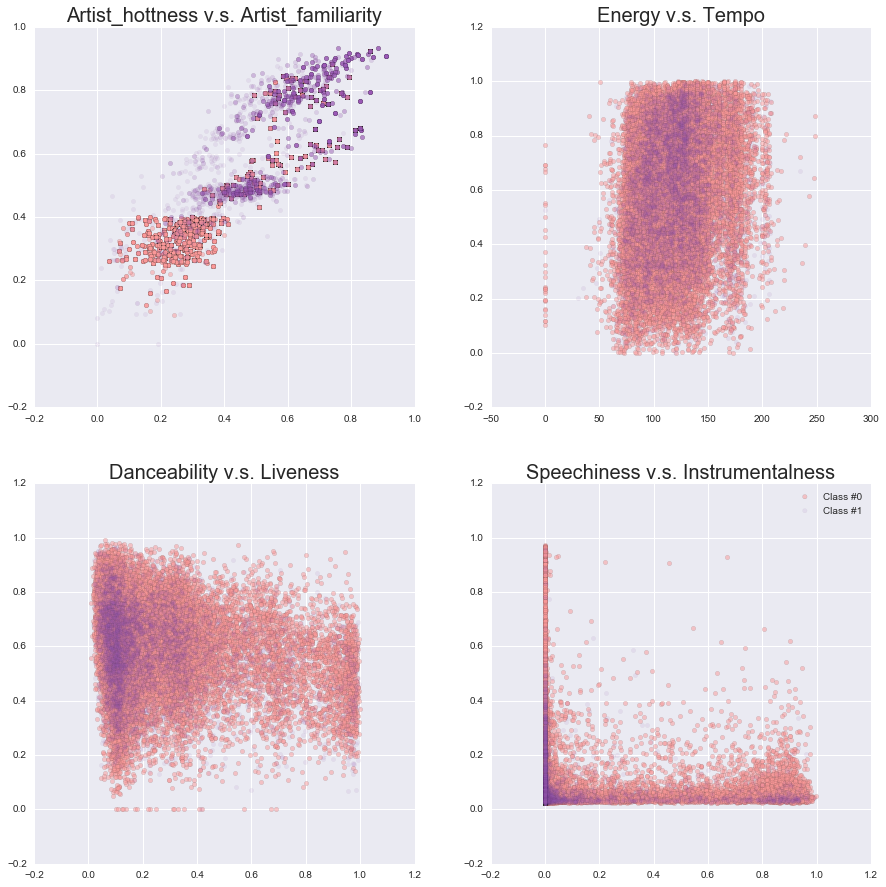

In [4]:
palette1 = sns.color_palette("Paired")
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
palette2 = sns.color_palette(flatui)
fs = 20 # fontsize
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

ax = list(itertools.product(range(2), range(2)))

combinations =  [('artist_familiarity', 'artist_hottness'),
                 ('tempo', 'energy'),
                 ('liveness', 'danceability'),
                 ('instrumentalness', 'speechiness')]

i = 0
for item in combinations:
    index = ax[i]
    x_vis = X[:, [features[item[0]], features[item[1]]]]
    axes[index[0], index[1]].scatter(x_vis[Y==0, 0], x_vis[Y==0, 1], label="Class #0",
                                     alpha=0.5, edgecolor=almost_black, 
                                     facecolor=palette1[4], linewidth=0.15)
    axes[index[0], index[1]].scatter(x_vis[Y==1, 0], x_vis[Y==1, 1], label="Class #1", 
                                     alpha=0.1, edgecolor=almost_black, 
                                     facecolor=palette2[0], linewidth=0.15)
    axes[index[0], index[1]].set_title(item[1].capitalize(),'v.s.',
                                       item[0].capitalize(), 
                                       fontsize=fs)

    i+=1
    
plt.legend()
plt.show()
